In [1]:
import pandas as pd
import requests
import h5py
import numpy as np
from PIL import Image
# 读取Excel表格


D:\anaconda\envs\nn6\lib\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


In [21]:
df = pd.read_excel('C:/Users/001/Desktop/137.xlsx', engine='openpyxl')

In [22]:
# # 图片下载路径
# image_path = 'C:/Users/001/Desktop/pic/'

# # 遍历表格中的每一行，下载图片并保存到指定文件夹
# for i, row in df.iterrows():
#     url = row['图片11']
#     response = requests.get(url)
#     with open(image_path + str(i + 1) + '.jpg', 'wb') as f:
#         f.write(response.content)

In [23]:
text_list = df.iloc[:, 3].tolist()

In [24]:
text_list

['\u200b\u200b“学历不但是敲门砖，也是我下不来的高台，更是孔乙己脱不下的长衫”。\u200b近日，一句“失意书生”的独白登上热搜，引来大量年轻人的共情。他们说：少年不懂孔乙己，读懂已是书中人。\u200b说的是念了大学，却找不 \u200b  展开全文c',
 '帽子戴的多了，根本不在意再多一个。 \u200b',
 '近日，“脱下孔乙己的长衫”引发网友热议。3月16日， 冲上热搜 。随后，鲁迅先生小说《孔乙己》里闻名中外的咸亨酒店，在天猫旗舰店挂出公告：“会写茴香豆的六种写法不妨碍你脱掉长衫。如果你也曾遭受挫折，也曾如孔乙己一般不顺，即日起，凭一年内 \u200b  展开全文c',
 '这篇文章的作者恐怕都没搞明白大家口中所说“脱不下的孔乙己长衫”指的是什么吧？ \u200b',
 ' 所以 孔乙己放下了架子，认真劳动，于是变成了骆驼祥子 ？ \u200b',
 '这个说法我认为很对。 \u200b',
 ' 据央视网评论，最近三年，我国高校毕业生规模持续攀升。2022年高校毕业生人数达到了1076万，创出历史新高。同时，由于经济下行压力加大，就业情况受到冲击，找一份专业匹配且待遇尚可的工作，肉眼可见变得越来 \u200b  展开全文c',
 '关于孔乙己现象，我从18年说，已经说过很多次。读书不是目的，满足他人需要，对社会有贡献才是挣脱自我的目标。读万卷书，行万里路，就算做不了多大贡献，也起码做一个真正理解逻辑、道理，认清社会的人。 \u200b',
 ' 近段时间，“孔乙己文学”火了。“学历是我下不来的高台，孔乙己脱不掉的长衫”“如果没有读过书，我一定心甘情愿地去工厂里拧螺丝，可是没有如果”这样的话术在网上引起许多网友模仿，话题也在各大新媒体社交平台上引起热烈讨论， \u200b  展开全文c',
 '但是学会茴香豆的四种写法之后，至少能够显著降低在中国SNS平台上遭遇炸耗的风险，这难道不实用？还要怎么样才实用呢？ \u200b',
 ' 对不起，我想起央视的又一力作：2023普利策奖。 \u200b',
 '  “怎么 你加班还加出乐子来了?” \u200b',
 '近日，“脱下孔乙己的长衫”引发网友热议。3月16日， 冲上热搜 。随后，鲁迅先生小说《孔乙己》里闻名中外的咸亨酒店挂出公告：“会写茴香豆的六种写法不妨碍你脱掉长衫。如果你也曾遭受挫

In [39]:
img_size = (224, 224)
with h5py.File('experiment.h5', 'w') as f:
    text_dataset = f.create_dataset('texts', shape=(len(text_list)), dtype=h5py.special_dtype(vlen=str))
    image_dataset = f.create_dataset('images', shape=(len(text_list), img_size[0], img_size[1], 3), dtype='uint8')
    
    for i, text in enumerate(text_list):
        # 将文本添加到数据集
        text_dataset[i] = text.strip()
        # 打开相应的图像文件并将其添加到数据集
        with Image.open(f'pic/{i + 1}.jpg') as img:
            img = img.convert('RGB')
            width, height = img.size
            if width > height:
                scale_factor = float(img_size[0]) / float(height)
                new_width = int(scale_factor * width)
                img = img.resize((new_width, img_size[0]), resample=Image.LANCZOS)
                offset = (new_width - img_size[1]) // 2
                img = img.crop((offset, 0, offset + img_size[1], img_size[0]))
            else:
                scale_factor = float(img_size[1]) / float(width)
                new_height = int(scale_factor * height)
                img = img.resize((img_size[1], new_height), resample=Image.LANCZOS)
                offset = (new_height - img_size[0]) // 2
                img = img.crop((0, offset, img_size[1], offset + img_size[0]))
            image_dataset[i] = np.asarray(img, dtype='uint8')

In [43]:
def byte2str(data):
    data = list(data)
    for i, item in enumerate(data):
        data[i] = item.decode('utf-8')
    return data

def load_exp_dataset(file_path):
    with h5py.File( file_path , 'r') as f:
        images = f['images']
        images = np.array(images)
        images = images.transpose((0, 3, 1, 2))
        images = images.astype('float32')
        images /= 255
        
        texts = byte2str(f['texts'])
        texts = np.array(texts)
        
        return images, texts


In [45]:
exp_file_path = 'experiment.h5'
exp_images, exp_texts = load_exp_dataset(exp_file_path)

In [46]:
print(exp_images)
print(exp_texts)


[[[[0.9647059  0.9647059  0.9647059  ... 0.9647059  0.9647059
    0.9647059 ]
   [0.9647059  0.9647059  0.9647059  ... 0.9647059  0.9647059
    0.9647059 ]
   [0.9647059  0.9647059  0.9647059  ... 0.9647059  0.9647059
    0.9647059 ]
   ...
   [0.9647059  0.9647059  0.9647059  ... 0.9647059  0.9647059
    0.9647059 ]
   [0.9647059  0.9647059  0.9647059  ... 0.9647059  0.9647059
    0.9647059 ]
   [0.9647059  0.9647059  0.9647059  ... 0.9647059  0.9647059
    0.9647059 ]]

  [[0.77254903 0.77254903 0.77254903 ... 0.77254903 0.77254903
    0.77254903]
   [0.77254903 0.77254903 0.77254903 ... 0.77254903 0.77254903
    0.77254903]
   [0.77254903 0.77254903 0.77254903 ... 0.77254903 0.77254903
    0.77254903]
   ...
   [0.77254903 0.77254903 0.77254903 ... 0.77254903 0.77254903
    0.77254903]
   [0.77254903 0.77254903 0.77254903 ... 0.77254903 0.77254903
    0.77254903]
   [0.77254903 0.77254903 0.77254903 ... 0.77254903 0.77254903
    0.77254903]]

  [[0.25882354 0.25882354 0.25882354 ...

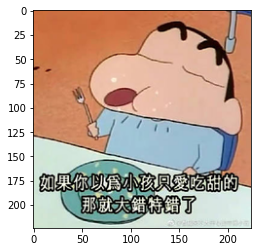

In [51]:
import matplotlib.pyplot as plt
plt.imshow(exp_images[119].transpose(1, 2, 0))
plt.show()